In [2]:
import numpy as np
import imageio
import os

def calculate_entropy(image_path):
    """
    Calculate entropy of a given MRI image.
    
    Args:
    - image_path: Path to the MRI image
    
    Returns:
    - entropy_value: Entropy value of the image
    """
    # Load the MRI image
    image = imageio.imread(image_path)
    
    # Convert the image to grayscale if it's RGB
    if len(image.shape) == 3:
        image = image.mean(axis=2)
    
    # Calculate entropy
    histogram = np.histogram(image, bins=256, range=(0, 255))[0]
    probabilities = histogram / float(np.sum(histogram))
    entropy_value = - np.sum(probabilities * np.log2(probabilities + 1e-10))  # Adding a small value to avoid log(0)
    
    return entropy_value

def main():
    # Directory containing the MRI images
    images_directory = "C:/Users/91703/Desktop/project/AD/ad1 and layers"
    
    # Iterate over each MRI image in the directory
    for image_file in os.listdir(images_directory):
        if image_file.endswith(".png") or image_file.endswith(".jpg"):  # Assuming images are in PNG or JPEG format
            image_path = os.path.join(images_directory, image_file)
            entropy_value = calculate_entropy(image_path)
            print(f"Entropy of {image_file}: {entropy_value}")

if __name__ == "__main__":
    main()


C:\Users\91703\AppData\Local\Temp\ipykernel_15328\694848637.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


Entropy of 90.png: 4.790029236350346
Entropy of 91.png: 4.752536458768818
Entropy of 92.png: 4.776394828725644
Entropy of 93.png: 4.799267240429581
Entropy of 94.png: 4.780951081502943
Entropy of 95.png: 4.824246814122874
Entropy of 96.png: 4.795680399433664
Entropy of 97.png: 4.780260232163046


In [4]:
pip install SimpleITK


   ---------------------------------------- 18.1/18.1 MB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install opencv-python


   -----------                              11.6/38.6 MB 665.4 kB/s eta 0:00:41
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\91703\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\91703\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "c:\Users\91703\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "c:\Users\91703\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
  File "c:\Users\91703\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "c:\Users\91703\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "c:\Users\91703\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "c:\Users\91703\anaconda3\

In [13]:
import numpy as np
import cv2  # OpenCV
# If you prefer PIL, you can use the following instead:
# from PIL import Image

def compute_entropy(image):
    # Compute entropy of the image
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist[hist > 0]
    prob = hist / np.sum(hist)
    entropy = -np.sum(prob * np.log2(prob))
    return entropy

def compute_homological_entropies(image_stack):
    # Compute entropy for different homological layers
    entropies = []
    for layer in range(image_stack.shape[2]):
        entropy = compute_entropy(image_stack[:, :, layer])
        entropies.append(entropy)
    return entropies

def main():
    # Load PNG images
    image_paths = ["C:/Users/91703/Desktop/project/AD/ad1 and layers/90.png", "C:/Users/91703/Desktop/project/AD/ad1 and layers/91.png","C:/Users/91703/Desktop/project/AD/ad1 and layers/92.png","C:/Users/91703/Desktop/project/AD/ad1 and layers/93.png"]  # Replace with actual paths
    images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths]

    # Check dimensions and adjust accordingly
    max_depth = max(image.shape[1] for image in images)
    stacked_images = np.zeros((images[0].shape[0], max_depth, len(images)))
    for idx, image in enumerate(images):
        stacked_images[:, :image.shape[1], idx] += image

    # Compute entropy for different homological layers
    homological_entropies = compute_homological_entropies(stacked_images)

    # Print results
    for i, entropy in enumerate(homological_entropies):
        print(f"Entropy of homological layer h{i}: {entropy}")

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'cv2'

In [14]:
import numpy as np
from PIL import Image

def compute_entropy(image):
    # Compute entropy of the image
    hist = np.histogram(image.flatten(), bins=256)[0]
    hist = hist[hist > 0]
    prob = hist / np.sum(hist)
    entropy = -np.sum(prob * np.log2(prob))
    return entropy

def compute_homological_entropies(image_stack):
    # Compute entropy for different homological layers
    entropies = []
    for layer in range(image_stack.shape[2]):
        entropy = compute_entropy(image_stack[:, :, layer])
        entropies.append(entropy)
    return entropies

def main():
    # Load PNG images
    image_paths = ["C:/Users/91703/Desktop/project/AD/ad1 and layers/90.png", "C:/Users/91703/Desktop/project/AD/ad1 and layers/91.png","C:/Users/91703/Desktop/project/AD/ad1 and layers/92.png","C:/Users/91703/Desktop/project/AD/ad1 and layers/93.png"]  # Replace with actual paths
    images = [np.array(Image.open(path).convert("L")) for path in image_paths]

    # Check dimensions and adjust accordingly
    max_depth = max(image.shape[1] for image in images)
    stacked_images = np.zeros((images[0].shape[0], max_depth, len(images)))
    for idx, image in enumerate(images):
        stacked_images[:, :image.shape[1], idx] += image

    # Compute entropy for different homological layers
    homological_entropies = compute_homological_entropies(stacked_images)

    # Print results
    for i, entropy in enumerate(homological_entropies):
        print(f"Entropy of homological layer h{i}: {entropy}")

if __name__ == "__main__":
    main()


ValueError: operands could not be broadcast together with shapes (398,411) (433,411) (398,411) 

In [16]:
import numpy as np
from PIL import Image

def compute_entropy(image):
    # Compute entropy of the image
    hist = np.histogram(image.flatten(), bins=256)[0]
    hist = hist[hist > 0]
    prob = hist / np.sum(hist)
    entropy = -np.sum(prob * np.log2(prob))
    return entropy

def compute_homological_entropies(image_stack):
    # Compute entropy for different homological layers
    entropies = []
    for layer in range(image_stack.shape[2]):
        entropy = compute_entropy(image_stack[:, :, layer])
        entropies.append(entropy)
    return entropies

def main():
    # Load PNG images
    image_paths = ["C:/Users/91703/Desktop/project/AD/ad1 and layers/90.png", "C:/Users/91703/Desktop/project/AD/ad1 and layers/91.png","C:/Users/91703/Desktop/project/AD/ad1 and layers/92.png","C:/Users/91703/Desktop/project/AD/ad1 and layers/93.png",
                 "C:/Users/91703/Desktop/project/AD/ad1 and layers/94.png","C:/Users/91703/Desktop/project/AD/ad1 and layers/95.png","C:/Users/91703/Desktop/project/AD/ad1 and layers/96.png","C:/Users/91703/Desktop/project/AD/ad1 and layers/97.png"  ]  # Replace with actual paths
    images = [np.array(Image.open(path).convert("L")) for path in image_paths]

    # Resize images to the smallest common dimensions
    min_height = min(image.shape[0] for image in images)
    min_width = min(image.shape[1] for image in images)
    images_resized = [image[:min_height, :min_width] for image in images]

    # Check dimensions and adjust accordingly
    max_depth = max(len(images_resized), 1)
    stacked_images = np.zeros((min_height, min_width, max_depth))
    for idx, image in enumerate(images_resized):
        stacked_images[:, :, idx] += image

    # Compute entropy for different homological layers
    homological_entropies = compute_homological_entropies(stacked_images)

    # Print results
    for i, entropy in enumerate(homological_entropies):
        print(f"Entropy of homological layer h{i}: {entropy}")

if __name__ == "__main__":
    main()


Entropy of homological layer h0: 5.045735203994251
Entropy of homological layer h1: 5.191972808894285
Entropy of homological layer h2: 5.2115365643416665
Entropy of homological layer h3: 5.240274326927576
Entropy of homological layer h4: 5.216890249070961
Entropy of homological layer h5: 5.262149565975033
Entropy of homological layer h6: 5.231183734618158
Entropy of homological layer h7: 5.215477495082082


c:\Users\91703\anaconda3\lib\site-packages\ripser\ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
C:\Users\91703\AppData\Local\Temp\ipykernel_29632\1610385545.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pd_array = np.array(pd)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

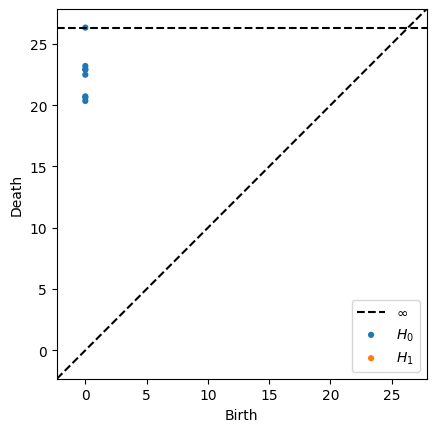

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.measure import shannon_entropy
from ripser import ripser
from persim import plot_diagrams
from tkinter import Tk, filedialog

def compute_homological_entropies(pd):
    pd_array = np.array(pd)
    # Compute entropy for different homological layers
    entropies = []
    for dim in range(3):
        hom_dim = pd_array[pd_array[:, 0] == dim]
        if len(hom_dim) == 0:
            entropies.append(np.nan)
        else:
            hom_dim_values = hom_dim[:, 1]
            entropy = shannon_entropy(hom_dim_values)
            entropies.append(entropy)
    return entropies



def select_folder():
    root = Tk()
    root.withdraw()  # Hide the main window
    folder_path = filedialog.askdirectory()  # Open folder dialog
    return folder_path

def main():
    # Ask user to select folder containing images
    folder_path = select_folder()
    if not folder_path:
        print("No folder selected. Exiting...")
        return

    # List all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.png') or f.endswith('.jpg')]

    # Load images and create 3D stack
    images = [io.imread(os.path.join(folder_path, f), as_gray=True) for f in image_files]
    max_height = max(image.shape[0] for image in images)
    max_width = max(image.shape[1] for image in images)
    stacked_images = np.zeros((len(images), max_height * max_width))
    for idx, image in enumerate(images):
        stacked_images[idx, :] = image.flatten()

    # Save 3D stack as a NumPy array file
    np.save('stacked_images.npy', stacked_images)

    # Compute persistent diagram
    pd = ripser(stacked_images)['dgms']

    # Plot persistent diagram
    plot_diagrams(pd)

    # Compute entropies from persistent diagram
    entropies = compute_homological_entropies(pd)

    # Print results
    for i, entropy in enumerate(entropies):
        print(f"Entropy of homological layer h{i}: {entropy}")

    # Show plot
    plt.show()

if __name__ == "__main__":
    main()
